In [1]:
!pip3 install pandas-datareader

In [2]:
!pip install --upgrade mplfinance

     |████████████████████████████████| 71kB 3.4MB/s 


Import **Libraries**

In [3]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import mplfinance as mpf
import mplfinance as mpf
from pandas_datareader import data as web

Import ARBB Stock Price

In [4]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2021,4,16)

df = web.DataReader('7181.KL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,0.295,0.285,0.290,0.290,64900,0.290
2019-01-03,0.310,0.285,0.285,0.310,47200,0.310
2019-01-04,0.350,0.315,0.320,0.315,186400,0.315
2019-01-07,0.340,0.300,0.300,0.340,104200,0.340
2019-01-08,0.340,0.320,0.330,0.325,224600,0.325


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-12,0.360,0.350,0.360,0.350,10016000,0.350
2021-04-13,0.355,0.345,0.350,0.345,10294000,0.345
2021-04-14,0.360,0.345,0.345,0.355,7318400,0.355
2021-04-15,0.360,0.345,0.355,0.345,12463600,0.345
2021-04-16,0.355,0.345,0.350,0.345,6997200,0.345


In [6]:
df.shape

(565, 6)

Data Visualization

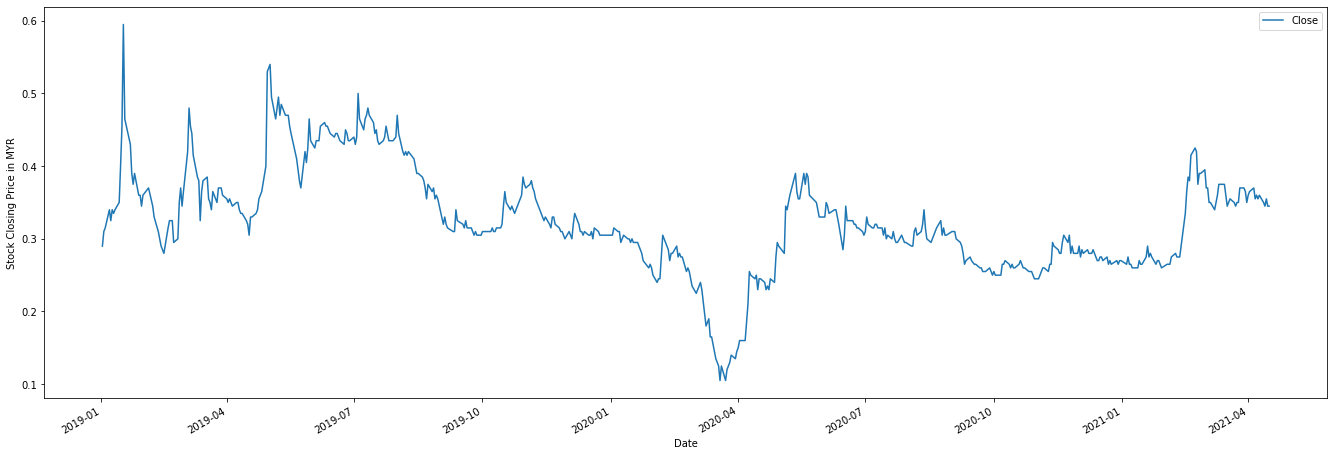

In [7]:
df['Close'].plot(figsize=(23,8))
plt.ylabel('Stock Closing Price in MYR')
plt.legend()
plt.show()

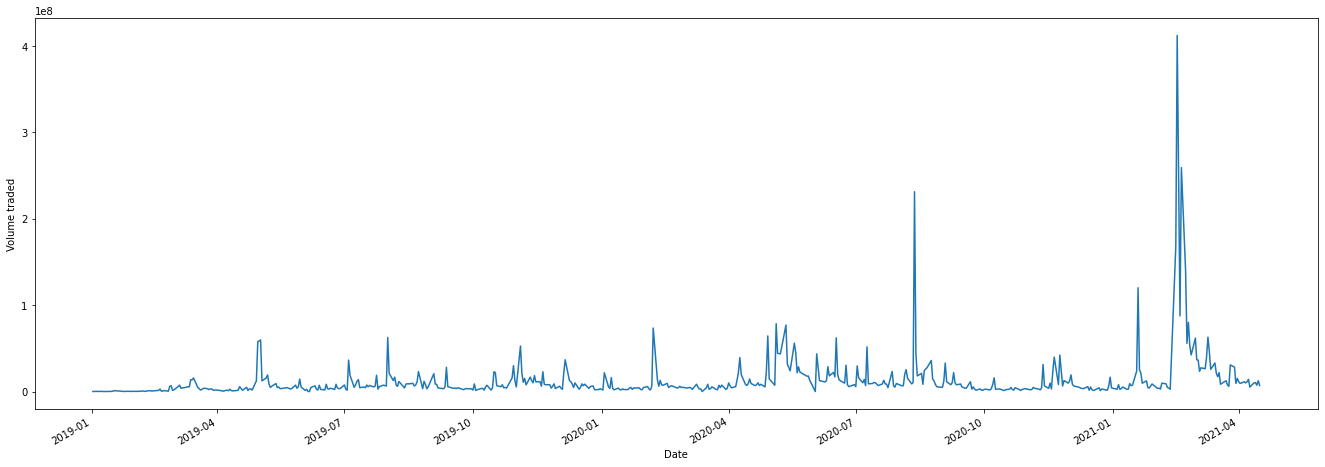

In [8]:
df['Volume'].plot(label= 'Volume',figsize= (23,8))
plt.ylabel('Volume traded')
plt.show()

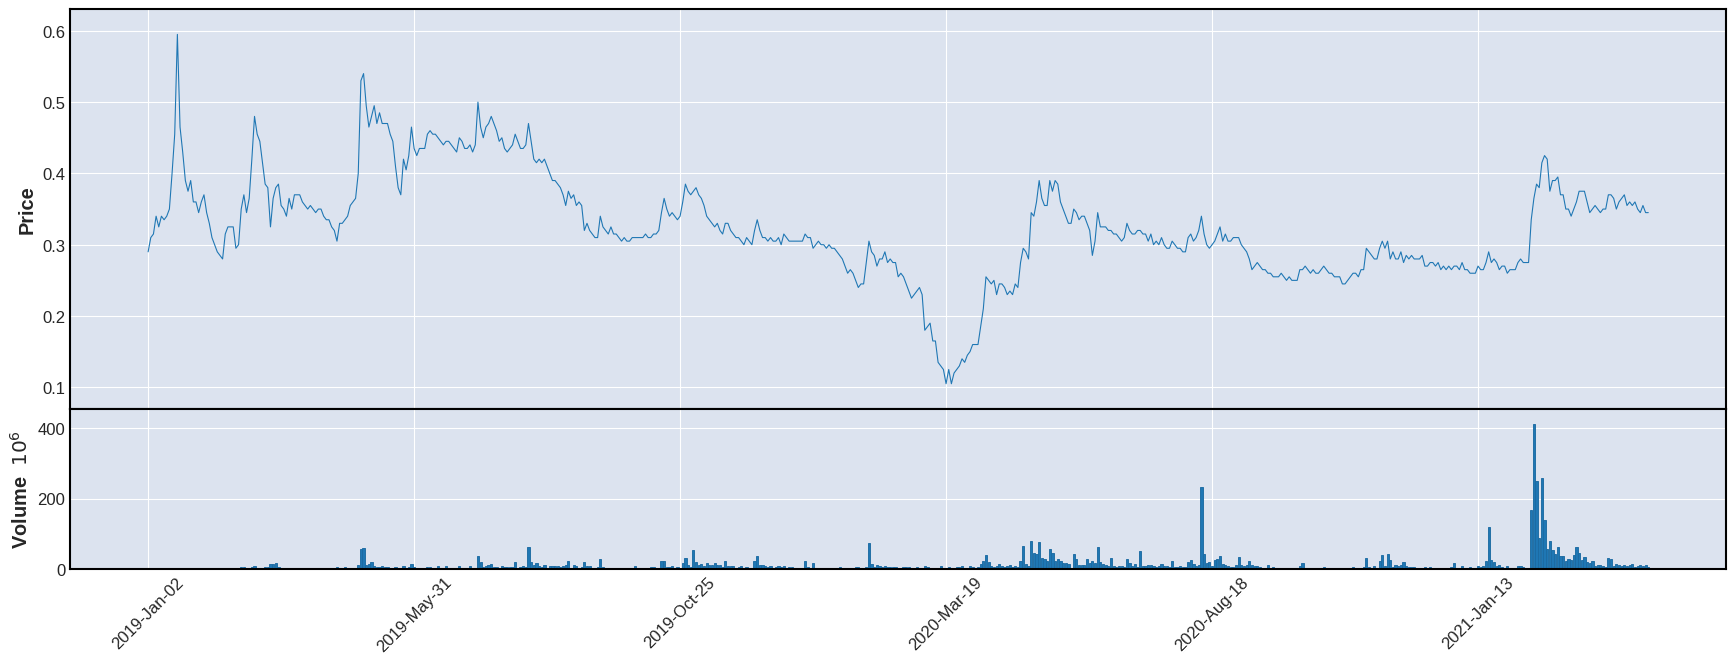

In [9]:
mpf.plot(df,type='line',volume=True,figsize=(23,8))

In [10]:
df['Volume'].argmax()

521

In [11]:
df.iloc[[df['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-16,0.41,0.34,0.34,0.365,412298400,0.365


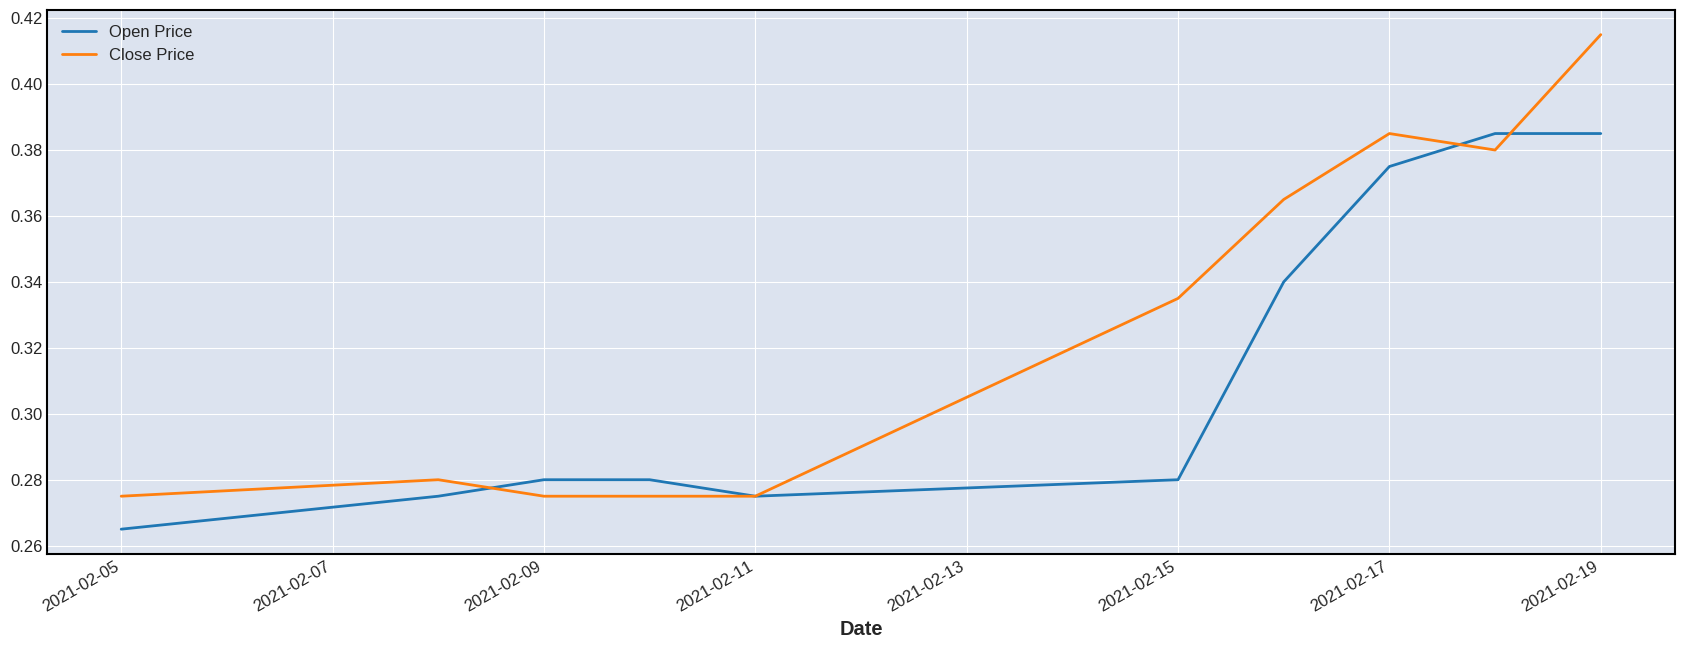

In [12]:
df.iloc[515:525]['Open'].plot(label= 'Open Price',figsize= (21,8))
df.iloc[515:525]['Close'].plot(label= 'Close Price')
plt.legend()

Moving Average

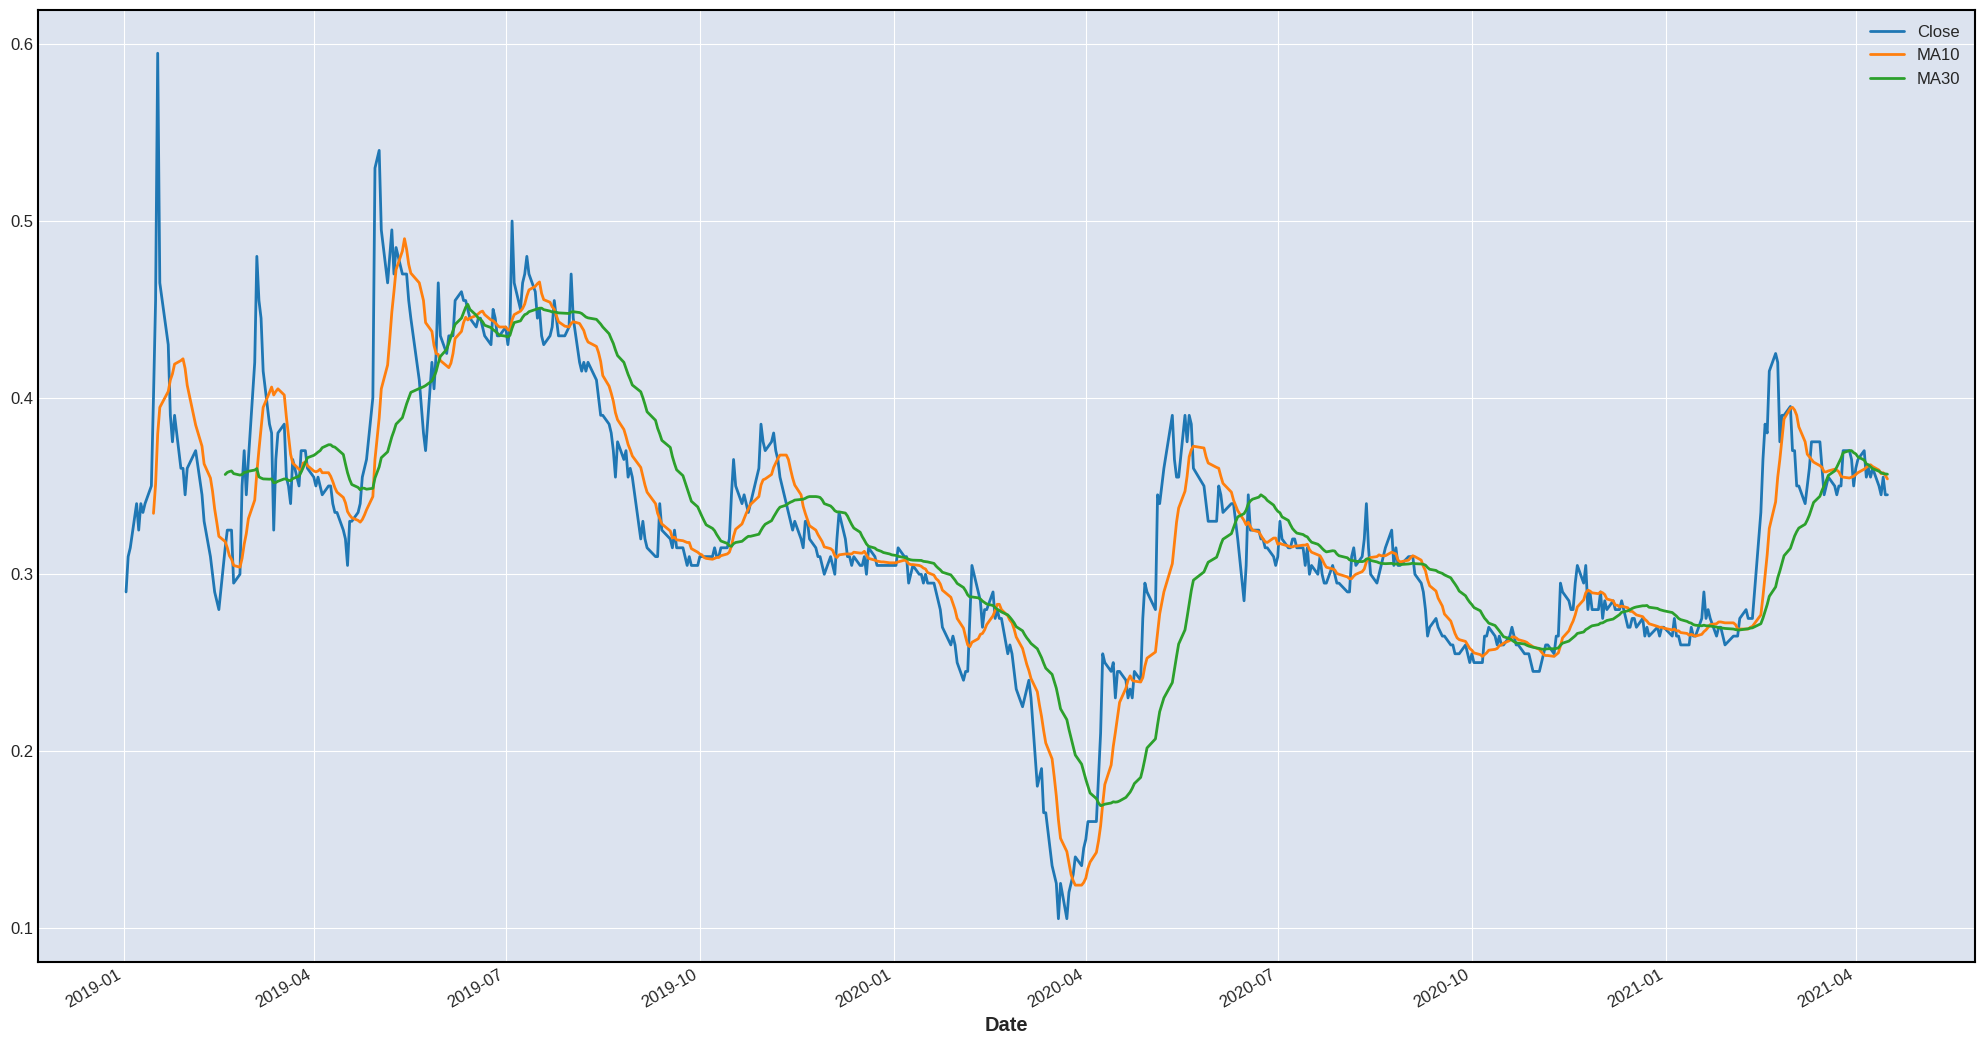

In [13]:
df['Close'].plot(figsize= (25,14))
df['MA10']= df['Close'].rolling(10).mean()
df['MA10'].plot()
df['MA30']= df['Close'].rolling(30).mean()
df['MA30'].plot()
plt.legend()

Predicting Stock Price

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [15]:
# create a dataframe with 'Close' column.
data=df.filter(['Close'])
# convert to array
dataset=data.values
# get the number of rows to train on
training_data_len= math.ceil(len(dataset)*.75)

training_data_len

424

In [16]:
#scaled the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.37755099],
       [0.41836733],
       [0.4285714 ],
       [0.47959182],
       [0.44897954],
       [0.47959182],
       [0.46938775],
       [0.47959182],
       [0.49999996],
       [0.6020408 ],
       [0.7142857 ],
       [1.        ],
       [0.73469384],
       [0.66326528],
       [0.58163259],
       [0.55102038],
       [0.58163259],
       [0.52040817],
       [0.52040817],
       [0.48979589],
       [0.52040817],
       [0.54081631],
       [0.48979589],
       [0.45918368],
       [0.41836733],
       [0.39795919],
       [0.37755099],
       [0.36734691],
       [0.35714284],
       [0.4285714 ],
       [0.44897954],
       [0.44897954],
       [0.44897954],
       [0.38775506],
       [0.39795919],
       [0.49999996],
       [0.54081631],
       [0.48979589],
       [0.53061224],
       [0.64285708],
       [0.76530606],
       [0.7142857 ],
       [0.6938775 ],
       [0.63265301],
       [0.57142852],
       [0.56122445],
       [0.44897954],
       [0.530

In [17]:
# Create a training dataset
# Create a scaled training dataset
train_data=scaled_data[0:training_data_len,:]
#Split the into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(30, len(train_data)):
  x_train.append(train_data[i-30:i,0])
  y_train.append(train_data[i,0])
  if i<=30:
    print(x_train)
    print(y_train)
    print()

[array([0.37755099, 0.41836733, 0.4285714 , 0.47959182, 0.44897954,
       0.47959182, 0.46938775, 0.47959182, 0.49999996, 0.6020408 ,
       0.7142857 , 1.        , 0.73469384, 0.66326528, 0.58163259,
       0.55102038, 0.58163259, 0.52040817, 0.52040817, 0.48979589,
       0.52040817, 0.54081631, 0.48979589, 0.45918368, 0.41836733,
       0.39795919, 0.37755099, 0.36734691, 0.35714284, 0.4285714 ])]
[0.4489795449796919]



In [18]:
# convert the x_train and y_train to numpy array
x_train,y_train=np.array(x_train),np.array(y_train)


In [19]:
# Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(394, 30, 1)

In [20]:
# Build the LSTM model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [21]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
# Train the model
model.fit(x_train,y_train,batch_size=1, epochs=1)

394/394 [==============================] - 5s 12ms/step - loss: 0.0027


In [48]:
# Create the testing data set
# Create a new array containing scaled values from the index
test_data=scaled_data[training_data_len -30:, :]
# Create the data ses x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(30, len(test_data)):
  x_test.append(test_data[i-30:i, 0])

In [49]:
# convert the data to numpy array
x_test=np.array(x_test)

In [50]:
# reshape the data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [51]:
# Get the model predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [52]:
# Get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test )**2)
rmse

0.00457510510657696

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

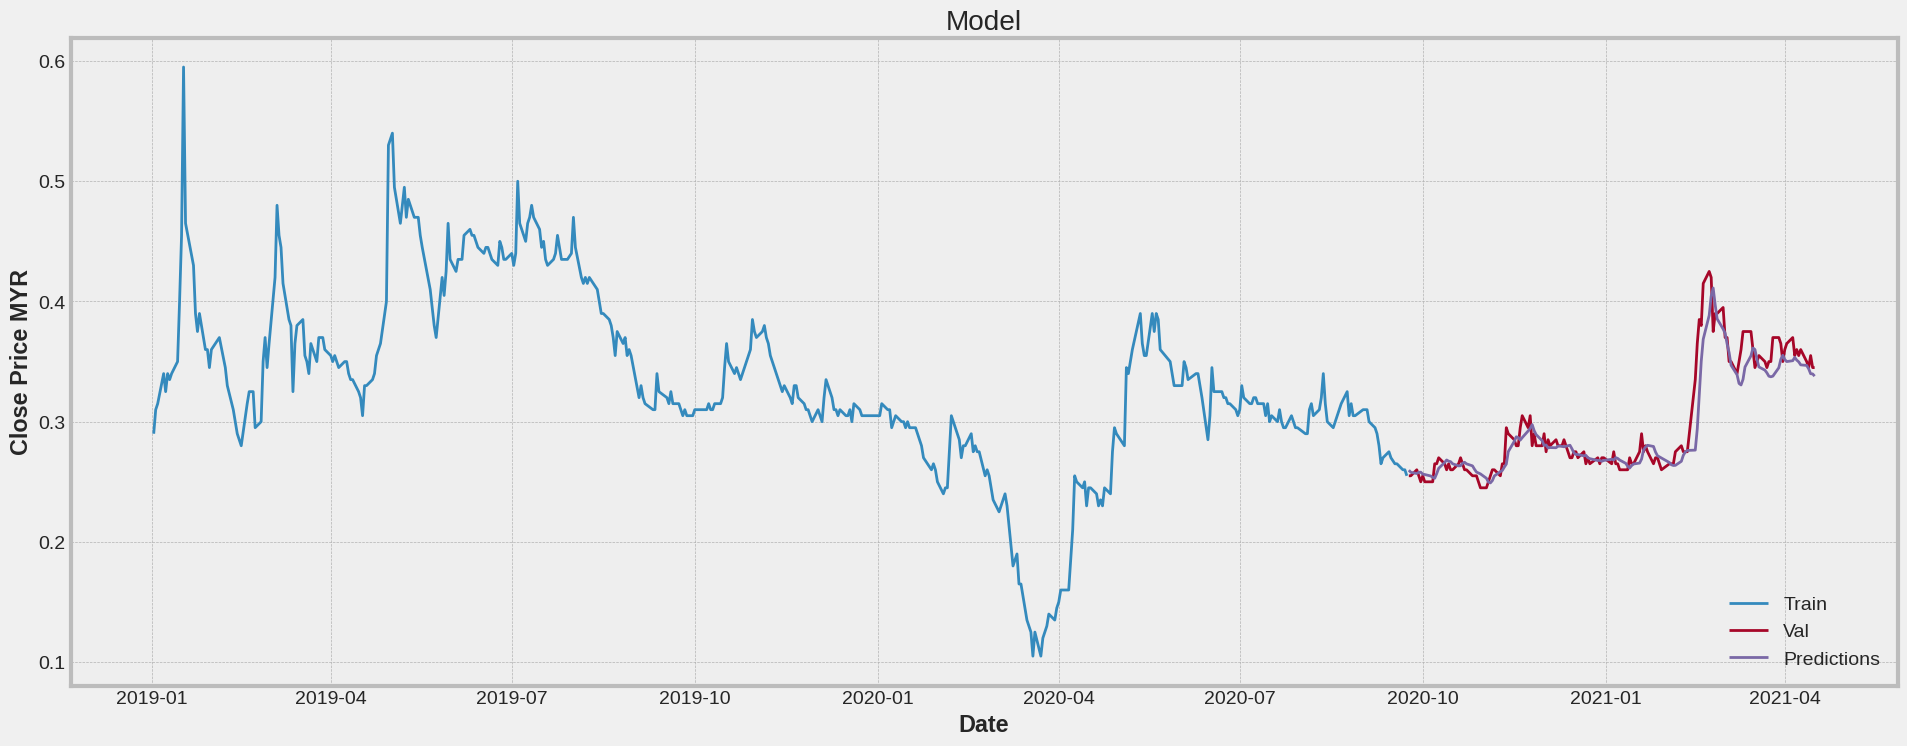

In [53]:
# Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#Visualize the data
plt.figure(figsize=(21,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price MYR')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc='lower right')
plt.show

In [54]:
valid

,Close,Predictions
Date,,
2020-09-24,0.255,0.259662
2020-09-25,0.255,0.257906
2020-09-28,0.260,0.256882
2020-09-29,0.255,0.257924
2020-09-30,0.250,0.257997
...,...,...
2021-04-12,0.350,0.346812
2021-04-13,0.345,0.344006
2021-04-14,0.355,0.339891


In [56]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2021,4,16)

arbb_quote = web.DataReader('7181.KL', 'yahoo', start, end)
new_df=arbb_quote.filter(['Close'])
last_30_days=new_df[-30:].values
last_30_days_scaled= scaler.transform(last_30_days)
X_test=[]
X_test.append(last_30_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price= model.predict(X_test)
pred_price= scaler.inverse_transform(pred_price)
print(pred_price)

[[0.3362188]]
